In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv' , low_memory=False)
 

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Here `selldate` is :  9   saledate    412698 non-null  object 

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
print(type(df['saledate'][0]))

<class 'str'>


In [8]:
df.saledate.head(20)

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
5     12/18/2008 0:00
6      8/26/2004 0:00
7     11/17/2005 0:00
8      8/27/2009 0:00
9       8/9/2007 0:00
10     8/21/2008 0:00
11     8/24/2006 0:00
12    10/20/2005 0:00
13     1/26/2006 0:00
14      1/3/2006 0:00
15    11/16/2006 0:00
16     6/14/2007 0:00
17     1/28/2010 0:00
18      3/9/2006 0:00
19    11/17/2005 0:00
Name: saledate, dtype: object

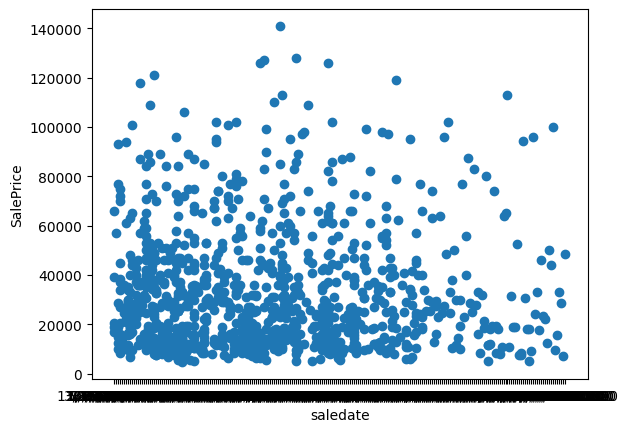

In [9]:
from matplotlib.pyplot import xlabel, ylabel


fig , ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

xlabel('saledate')
ylabel('SalePrice')
plt.show()


THe selldate is so much messy , we will change the saledate to year

In [10]:
df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv' , low_memory=False , parse_dates=['saledate'] )

df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
type(df.saledate[0])

pandas._libs.tslibs.timestamps.Timestamp

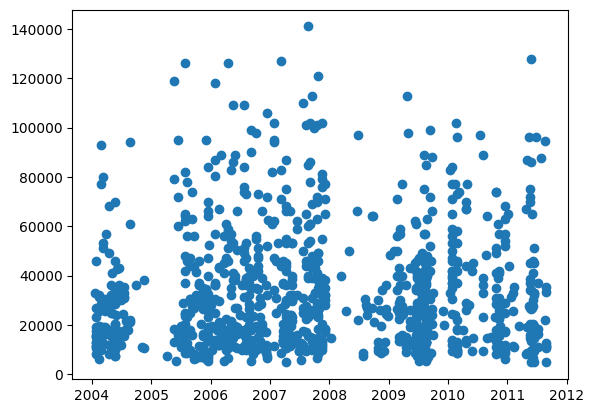

In [12]:
fig , ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])
plt.show()

From the graph , we see in year 2005 , 2008 they had very low sales. The highest sales was in the end of 2007

It is usually better to sort data according to date

Now we will sort our data according to saledate

In [13]:
df_temp = df.sort_values(by = 'saledate' , ascending=True)

df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [14]:
df_temp['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

Now adjust the date more'

The following is datetime attrinbutes of pandas dataframe

follow [this](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html) link for more

In [15]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [16]:
df_temp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int32

In [17]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [18]:
df_temp[:1].saledate.dt.dayofweek #The day of the week with Monday=0, Sunday=6



205615    1
Name: saledate, dtype: int32

That means , 17th jan 1989 was a Tuesday

In [19]:
df_temp[2000:2001].saledate.dt.dayofyear

24414    115
Name: saledate, dtype: int32

Now we will add those attribute to our data frame

In [20]:
df_temp['year'] = df_temp.saledate.dt.year
df_temp['month'] = df_temp.saledate.dt.month
df_temp['day'] = df_temp.saledate.dt.day
df_temp['dayofweek'] = df_temp.saledate.dt.dayofweek
df_temp['dayofyear'] = df_temp.saledate.dt.dayofyear

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
#now as we added diff date attributes , we don't need saledate column

df_temp.drop(labels='saledate' , axis=1 , inplace=True)

In [23]:
df_temp['state'].unique().shape

(53,)

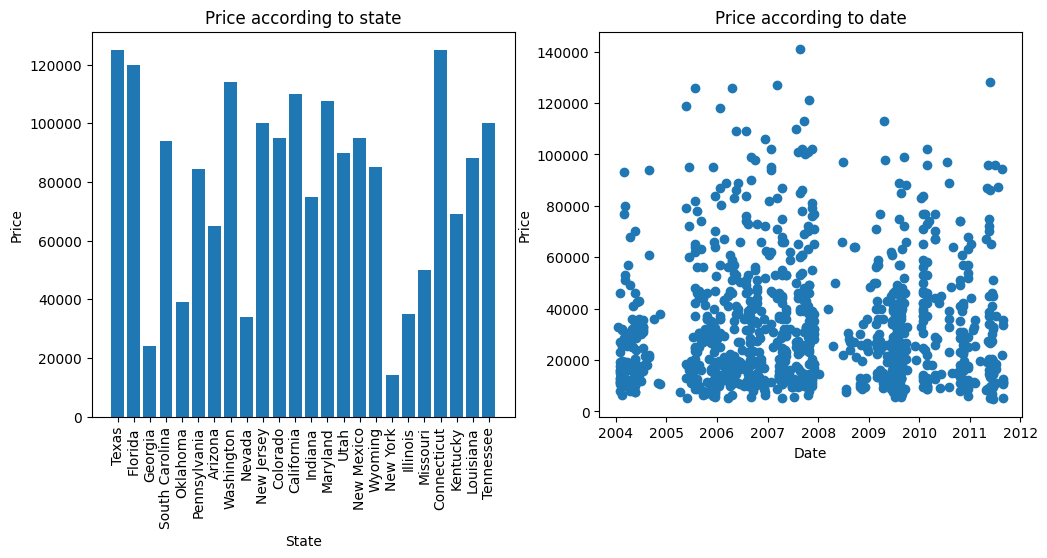

In [24]:
#lets see the price according to state



fig , (ax1 , ax2)  = plt.subplots(nrows=1 , ncols=2 , figsize=(12 , 5))

ax1.bar(df_temp['state'][:2000] , df_temp['SalePrice'][:2000])

ax2.scatter(df['saledate'][:1000], df['SalePrice'][:1000])


ax1.tick_params(axis='x', rotation=90)



ax1.set_title('Price according to state')
ax1.set_xlabel('State')
ax1.set_ylabel('Price')

ax2.set_title('Price according to date')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')

plt.show()

Here we can see that the price is high in Texas , florida and Connecticut

In [25]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

We've got lot of missing values , string/obj values, First we need to take care of those 

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

We first detect which columns have object/string values, for this we will use pandas `pandas.api.type` method see [here](https://pandas.pydata.org/docs/reference/arrays.html)

In [27]:
pd.api.types.is_string_dtype(df_temp['fiModelDesc'])

True

In [28]:
#finding all other obj columns


for label , content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Now we will change them to pandas category. 

Why catagory? because then each string will be assigned a number, which will help us in machine learning

In [29]:
for label , content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered() #here .cat.as_ordered() is used to make the categories in order like, string in ascending order || it is optional

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [31]:
df_temp['state'].cat.codes #here it will show the number assigned to each state || or : pd.Categorical(df_temp['state']).codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Still we have Nan or missing values, we have to take care of them

In [32]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Filling the missing values

#### First we will fill the missing values in numeric columns

In [33]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label , " : " ,pd.isnull(content).sum()) # or df_temp[label].isna().sum()
        # print()
        

SalesID  :  0
SalePrice  :  0
MachineID  :  0
ModelID  :  0
datasource  :  0
auctioneerID  :  20136
YearMade  :  0
MachineHoursCurrentMeter  :  265194
year  :  0
month  :  0
day  :  0
dayofweek  :  0
dayofyear  :  0


So we have two col with missing values

Now we will fill them with median values

Why median over mean? `because mean is less affected by outliers. beside median is more robust`

In [34]:

for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() :
            df_temp[label + '_is_missing'] = pd.isnull(content) # creating new column traking null values
            df_temp[label] = content.fillna(content.median())
    

            

In [35]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label , " : " ,pd.isnull(content).sum()) # or df_temp[label].isna().sum()
        # print()

SalesID  :  0
SalePrice  :  0
MachineID  :  0
ModelID  :  0
datasource  :  0
auctioneerID  :  0
YearMade  :  0
MachineHoursCurrentMeter  :  0
year  :  0
month  :  0
day  :  0
dayofweek  :  0
dayofyear  :  0
auctioneerID_is_missing  :  0
MachineHoursCurrentMeter_is_missing  :  0


In [36]:
df_temp['auctioneerID_is_missing'].value_counts()
# len(df_temp[df_temp['auctioneerID_is_missing'] == True])

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

#### Filling and turning categorical values into numbers

In [37]:
for label , content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label) #those are categorical columns

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
pd.Categorical(df_temp['state']).codes #give the number assigned to each state || or df_temp['state'].cat.codes 

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [39]:
for label , content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'_is_missing'] = pd.isnull(content)
        
        df_temp[label] = pd.Categorical(content).codes + 1
        

In [40]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [41]:
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [42]:
df_temp['state']

205615    44
274835     9
141296     9
212552     9
62755      9
          ..
410879     5
412476     5
411927     5
407124     5
409203     5
Name: state, Length: 412698, dtype: int8

Now all the missing values are filled and all val are numerics

Now we can train our model

### Creating a baseline model

In [43]:

from math import e
import time


st_time = time.time()

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42 # same as np.random.seed(42)
)

X_train = df_temp.drop('SalePrice' , axis=1)
y_train = df_temp['SalePrice']

model.fit(X_train , y_train)

end_time = time.time()
print('Time taken : ',end_time - st_time , 's')

Time taken :  111.6362738609314 s


In [44]:
model.score(X_train , y_train) #this use coefficient of determination

0.9875468079970562

Here the df_temp was from `TrainAndValid.CSV` file. 

SO it Contains the data of both train and valid data. 

Now we will split the data into train and valid data

According to kaggle doc :

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012

In [45]:
for label , content in df_temp.items():
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
year
month
day
dayofweek
dayofyear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_is_missing

In [46]:
df_train = df_temp[df_temp['year'] != 2012]

df_val = df_temp[df_temp['year'] == 2012]

len(df_train) , len(df_val)

(401125, 11573)

In [47]:
#Split data into X and y

from re import X


X_train , y_train = df_train.drop('SalePrice' , axis=1) , df_train['SalePrice']

X_val , y_val = df_val.drop('SalePrice' , axis=1) , df_val['SalePrice']

X_train.shape , y_train.shape , X_val.shape , y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [49]:
from os import pread
from sklearn.metrics import mean_squared_log_error , r2_score , mean_absolute_error


def rmsle(y_test , y_pred):
    return np.sqrt(mean_squared_log_error(y_test , y_pred))


def show_scores(model):
    trian_pred = model.predict(X_train)
    valid_pred = model.predict(X_val)
    
    scores = {
        "Training MAE: " : mean_absolute_error(y_train , trian_pred),
        "Valid MAE" : mean_absolute_error(y_val , valid_pred),
        
        "Training RMSLE" : rmsle(y_train , trian_pred),
        "Valid RMSLE" : rmsle(y_val , valid_pred),
        
        "Training R2" : r2_score(y_train , trian_pred),
        "Valid R2" : r2_score(y_val , valid_pred)
    }
    
    return scores

In [50]:
scores = show_scores(model)
scores

{'Training MAE: ': 1576.4843819607352,
 'Valid MAE': 1869.2186318154324,
 'Training RMSLE': 0.0841144059088283,
 'Valid RMSLE': 0.08746318355899653,
 'Training R2': 0.987563251253579,
 'Valid R2': 0.9868076830397394}

<Axes: >

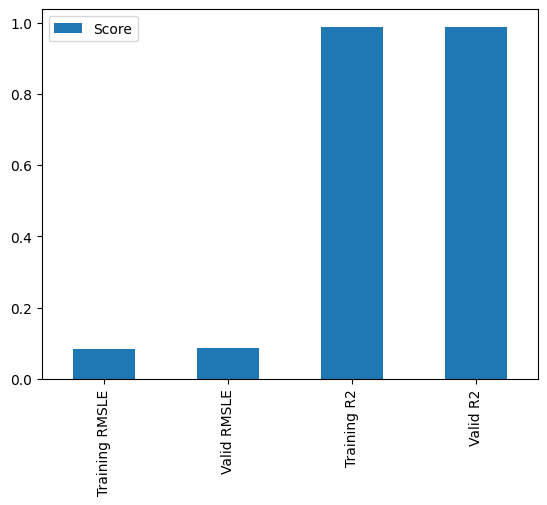

In [64]:
pd.DataFrame(scores , index = ['Score']).drop(['Training MAE: ' , 'Valid MAE'], axis=1).T.plot.bar()

In [51]:
mini_model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    max_samples=10000
)

mini_model.fit(X_train , y_train)

mini_scores = show_scores(mini_model)
mini_scores



{'Training MAE: ': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R2': 0.8606658995199189,
 'Valid R2': 0.8320374995090507}

<Axes: >

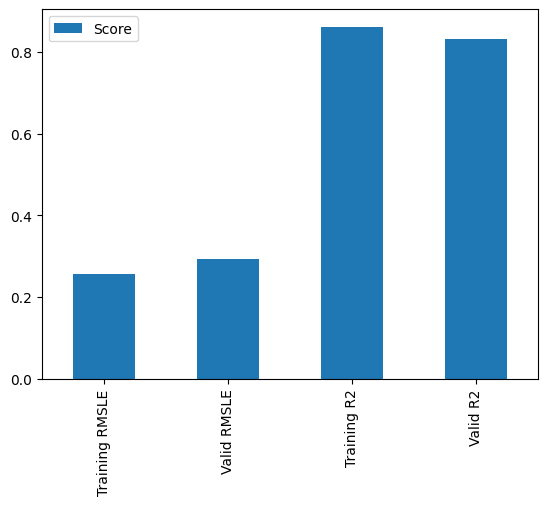

In [65]:
pd.DataFrame(mini_scores , index = ['Score']).drop(['Training MAE: ' , 'Valid MAE'], axis=1).T.plot.bar()

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [68]:
ideal_score = show_scores(rs_model)

In [72]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

In [69]:
ideal_score

{'Training MAE: ': 2356.919172017098,
 'Valid MAE': 5942.14314430213,
 'Training RMSLE': 0.11924274408159989,
 'Valid RMSLE': 0.24588920020855373,
 'Training R2': 0.973124519695906,
 'Valid R2': 0.8824130571981522}

In [71]:
from joblib import dump

dump(rs_model , "BulldozerPriceModel.joblib")

['BulldozerPriceModel.joblib']

In [3]:
import joblib
model = joblib.load("BulldozerPriceModel.joblib")
print(type(model))


<class 'sklearn.model_selection._search.RandomizedSearchCV'>


In [ ]:
import joblib

# Load full search object
search = joblib.load("BulldozerPriceModel.joblib")

# Extract and save only the best model
best_model = rs_model.best_params_
joblib.dump(best_model, "BulldozerPriceModel_best.joblib", compress=("xz", 3))


['BulldozerPriceModel_best.joblib']